# ALGORITMOS DE APRENDIZAJE SUPERVISADO "REGRESION LOGISTICA"

### Cargamos las librerias requeridas:

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve, auc

In [85]:
%matplotlib inline

### Cargamos nuestra base de datos:

In [86]:
dblogist = pd.read_csv('C:/Users/Juan2/Downloads/heart_cleveland_upload.csv')

In [87]:
print(dblogist.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

### Preprocesamiento de datos:

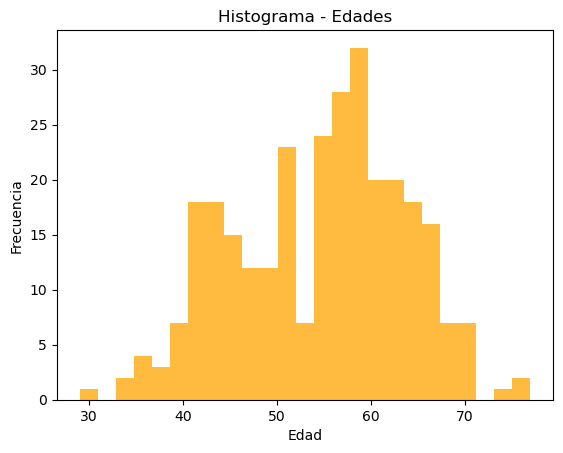

In [88]:
plt.hist(dblogist['age'], bins=25, color='orange', alpha=0.75)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma - Edades')
plt.show()

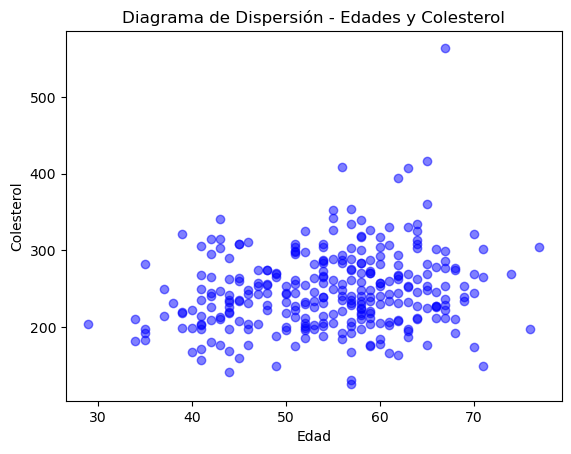

In [89]:
plt.scatter(datos['age'], datos['chol'], color='blue', alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Colesterol')
plt.title('Diagrama de Dispersión - Edades y Colesterol')
plt.show()

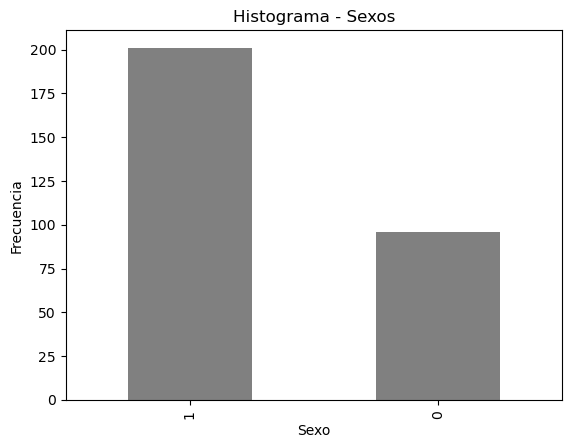

In [90]:
dblogist['sex'].value_counts().plot(kind='bar', color='grey')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.title('Histograma - Sexos')
plt.show()

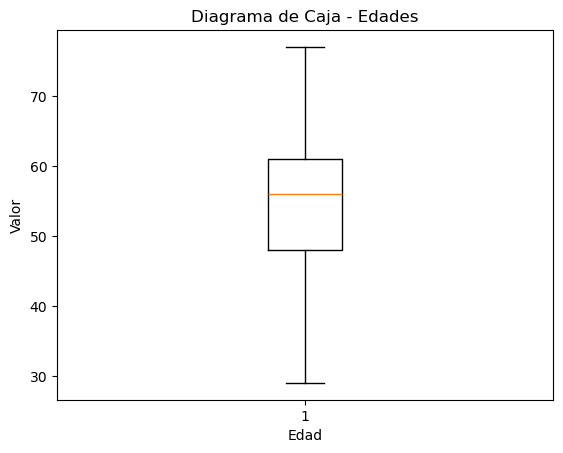

In [91]:
plt.boxplot(dblogist['age'])
plt.title('Diagrama de Caja - Edades')
plt.xlabel('Edad')
plt.ylabel('Valor')
plt.show()

In [92]:
imputer = SimpleImputer(strategy='median')
dblogist_sin_nulos = imputer.fit_transform(datos)

dblogist_categoricos = dblogist[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition']]
encoder = OneHotEncoder()
dblogist_categoricos_codificados = encoder.fit_transform(dblogist_categoricos)

dblogist_numericos = dblogist[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
scaler = StandardScaler()
dblogist_numericos_normalizados = scaler.fit_transform(dblogist_numericos)

dblogist_procesados = np.concatenate((dblogist_numericos_normalizados, dblogist_categoricos_codificados.toarray()), axis=1)

### Caracteristicas relevantes:

In [98]:
# Seleccionar las 5 características más relevantes utilizando chi-cuadrado
selector = SelectKBest(score_func=chi2, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
feature_names = X_train.columns[selector.get_support()]

### Extraer train y test:

In [99]:
X = dblogist[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']]
y = dblogist['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [100]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
159,68,1,3,144,193,1,0,141,0,3.4,1,2,2,1
90,62,1,2,130,231,0,0,146,0,1.8,1,3,2,0
269,48,1,3,130,256,1,2,150,1,0.0,0,2,2,1
157,70,1,3,145,174,0,0,125,1,2.6,2,0,2,1
198,60,1,3,130,206,0,2,132,1,2.4,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,53,0,3,130,264,0,2,143,0,0.4,1,0,0,0
192,61,1,3,120,260,0,0,140,1,3.6,1,1,2,1
117,52,1,2,172,199,1,0,162,0,0.5,0,0,2,0
47,52,1,1,134,201,0,0,158,0,0.8,0,1,0,0


### Entrenamiento del modelo:

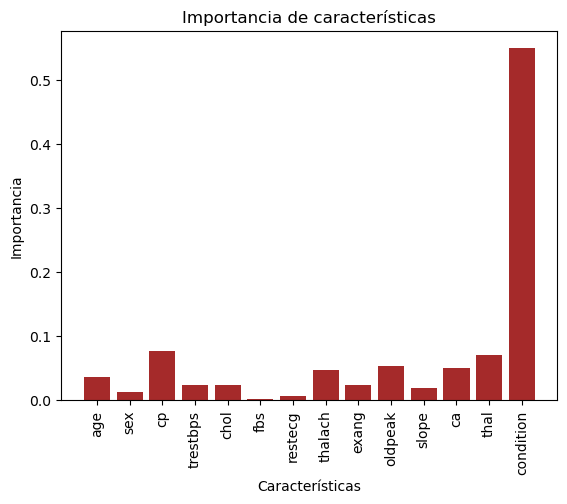

In [103]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

plt.bar(range(len(feature_importances)), feature_importances, color ='brown')
plt.xticks(range(len(feature_importances)), X_train.columns, rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de características')
plt.show()


In [106]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Longitud de X_train:", len(X_train))
print("Longitud de X_test:", len(X_test))
print("Longitud de y_train:", len(y_train))
print("Longitud de y_test:", len(y_test))

Longitud de X_train: 222
Longitud de X_test: 75
Longitud de y_train: 222
Longitud de y_test: 75


### Evaluacion del modelo

In [109]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precisión: 1.0
Recall: 1.0
F1-score: 1.0


In [112]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [117]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [118]:
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[34  0]
 [ 0 41]]


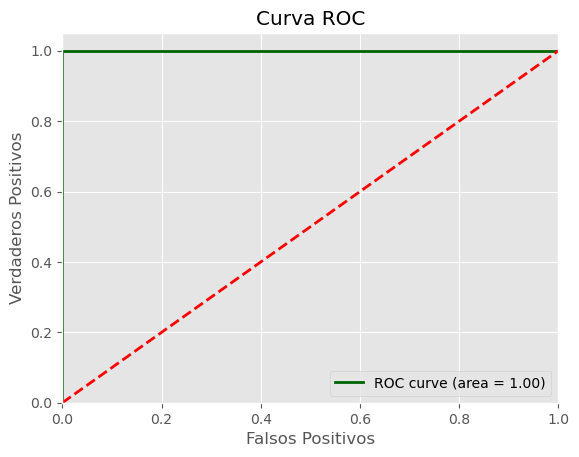

In [129]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

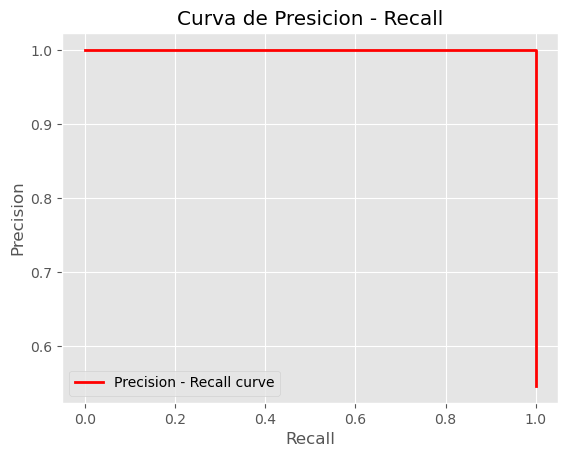

In [133]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, color='red', lw=2, label='Precision - Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Presicion - Recall')
plt.legend(loc="lower left")
plt.show()
